On souhaite analyser les donnée extraite du site (https://sparse.tamu.edu/)

In [4]:
import pandas as pd 

df = pd.read_csv("structural_engineering_unformat.csv" , sep=" 	")


/tmp/ipykernel_21307/4235171637.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("structural_engineering_unformat.csv" , sep=" 	")


In [5]:
df.head(100)

,Id,Name,Group,Rows,Cols,Nonzeros,Kind,Date
0,2660,Queen_4147,Janna,"4,147,110","4,147,110","316,548,962",2D/3D Problem,2014
1,2384,HV15R,Fluorem,"2,017,169","2,017,169","283,073,458",Computational Fluid Dynamics Problem,2011
2,2508,rgg_n_2_24_s0,DIMACS10,"16,777,216","16,777,216","265,114,400",Undirected Random Graph,2011
3,2494,kron_g500-logn21,DIMACS10,"2,097,152","2,097,152","182,082,942",Undirected Multigraph,2010
4,2507,rgg_n_2_23_s0,DIMACS10,"8,388,608","8,388,608","127,002,786",Undirected Random Graph,2011
...,...,...,...,...,...,...,...,...
95,2244,TSOPF_RS_b678_c2,TSOPF,"35,696","35,696","8,781,949",Power Network Problem,2009
96,2225,TSOPF_FS_b300_c2,TSOPF,"56,814","56,814","8,767,466",Power Network Problem,2009
97,1290,x104,DNVS,"108,384","108,384","8,713,602",Structural Problem,1999
98,858,pkustk12,Chen,"94,653","94,653","7,512,317",Structural Problem,2002


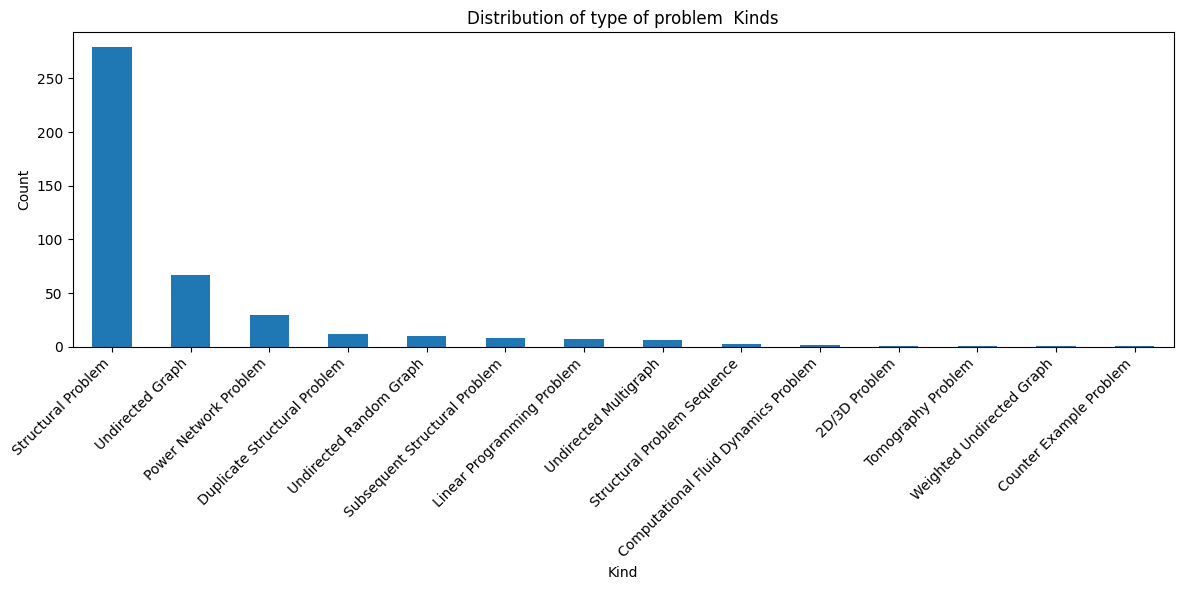

In [6]:
import matplotlib.pyplot as plt

df["Kind"].value_counts().plot(kind="bar", figsize=(12, 6))
plt.xticks(rotation=45, ha='right')  # rotate labels
plt.xlabel("Kind")
plt.ylabel("Count")
plt.title("Distribution of type of problem  Kinds")
plt.tight_layout()
plt.show()


In [7]:
df_cfd= df[df["Kind"].isin(["Structural Problem",  "Subsequent Structural Problem","Duplicate Structural Problem"  ,"Structural Problem Sequence"]) ]

In [8]:
df_cfd["Rows"] = df_cfd["Rows"].str.replace(",", "", regex=False).astype(int)
df_cfd["Cols"] = df_cfd["Cols"].str.replace(",", "", regex=False).astype(int)
df_cfd["Nonzeros"] = df_cfd["Nonzeros"].str.replace(",", "", regex=False).astype(int)



/tmp/ipykernel_21307/4012710383.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cfd["Rows"] = df_cfd["Rows"].str.replace(",", "", regex=False).astype(int)
/tmp/ipykernel_21307/4012710383.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cfd["Cols"] = df_cfd["Cols"].str.replace(",", "", regex=False).astype(int)
/tmp/ipykernel_21307/4012710383.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [9]:
df_cfd

,Id,Name,Group,Rows,Cols,Nonzeros,Kind,Date
5,2548,Cube_Coup_dt0,Janna,2164760,2164760,124406070,Structural Problem,2012
6,2549,Cube_Coup_dt6,Janna,2164760,2164760,124406070,Structural Problem,2012
7,2544,Flan_1565,Janna,1564794,1564794,114165372,Structural Problem,2011
8,2650,ML_Geer,Janna,1504002,1504002,110686677,Structural Problem,2012
13,2550,Long_Coup_dt0,Janna,1470152,1470152,84422970,Structural Problem,2012
...,...,...,...,...,...,...,...,...
423,72,bcsstm22,HB,138,138,138,Structural Problem,1984
424,58,bcsstm03,HB,112,112,72,Structural Problem,1982
425,59,bcsstm04,HB,132,132,66,Structural Problem,1982
426,57,bcsstm02,HB,66,66,66,Structural Problem,1982


In [10]:
df_cfd.describe()

,Id,Rows,Cols,Nonzeros,Date
count,302.000000,3.020000e+02,3.020000e+02,3.020000e+02,302.000000
mean,785.291391,1.268022e+05,1.268022e+05,6.021357e+06,1993.854305
std,698.302109,3.344175e+05,3.344175e+05,1.775393e+07,10.818587
min,23.000000,2.400000e+01,2.400000e+01,2.400000e+01,1974.000000
25%,113.250000,7.340000e+02,7.340000e+02,6.002250e+03,1982.000000
50%,818.500000,5.526000e+03,5.526000e+03,1.252015e+05,1995.000000
75%,1264.750000,5.268525e+04,5.268525e+04,2.593163e+06,2003.000000
max,2650.000000,2.164760e+06,2.164760e+06,1.244061e+08,2012.000000


<AxesSubplot: >

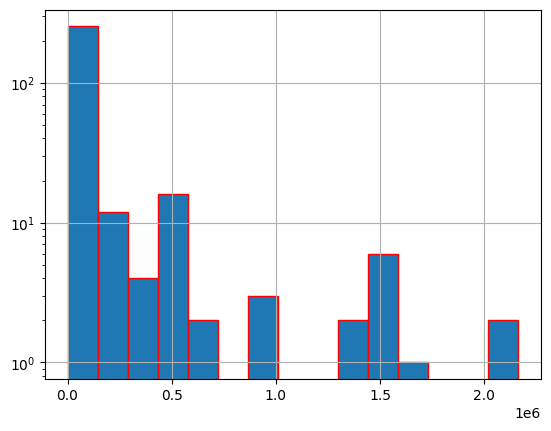

In [11]:
import matplotlib.pyplot as plt

df_cfd["Rows"].hist(bins=15, log=True , ec="red")

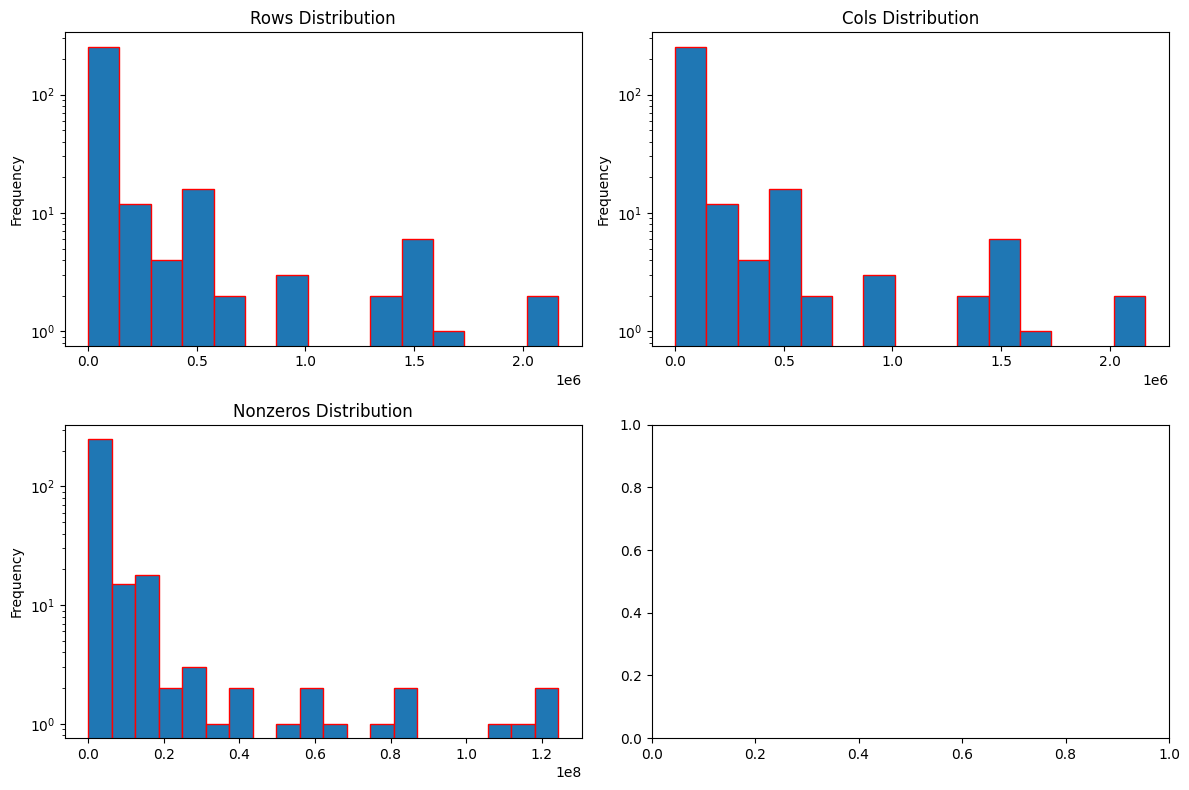

In [12]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

df_cfd["Rows"].plot.hist(ax=axs[0, 0], bins=15, log=True, ec="red")
axs[0, 0].set_title('Rows Distribution')

df_cfd["Cols"].plot.hist(ax=axs[0, 1], bins=15, log=True, ec="red")
axs[0, 1].set_title('Cols Distribution')

df_cfd["Nonzeros"].plot.hist(ax=axs[1, 0], bins=20, log=True, ec="red")
axs[1, 0].set_title('Nonzeros Distribution')



plt.tight_layout()
plt.show()
